slate:[987  67 628 193 800 921 893 528 391 945] t:0 clicls:[0 0 0 1 0 1 1 0 1 1] true_ctr[slate]:[0.67364995 0.65552242 0.58341731 0.5429588  0.54209747 0.53928728
 0.534016   0.51914838 0.50734925 0.50205848]
slate:[503 440 310 254 530 193 287 859 739 882] t:1 clicls:[0 0 1 0 0 0 0 1 1 0] true_ctr[slate]:[0.16510046 0.13744783 0.15706979 0.36297751 0.15232463 0.5429588
 0.17086963 0.37945301 0.12539908 0.35607481]
slate:[303 648 233 141 363 753 315 833  33 855] t:2 clicls:[0 0 0 0 0 0 1 1 0 0] true_ctr[slate]:[0.21058533 0.35094933 0.16365933 0.11011171 0.36225753 0.31019658
 0.26667284 0.32195946 0.02742268 0.24887732]
slate:[762 837 437 574 491 785 305 810 636 703] t:3 clicls:[0 0 0 0 0 0 0 0 0 0] true_ctr[slate]:[0.120898   0.0773296  0.09995265 0.15547424 0.17559612 0.20115338
 0.1999731  0.08617828 0.15777664 0.2318137 ]
slate:[987  67 628 193 800 921 893 528 391 945] t:4 clicls:[1 1 0 1 0 1 0 0 1 0] true_ctr[slate]:[0.67364995 0.65552242 0.58341731 0.5429588  0.54209747 0.539287

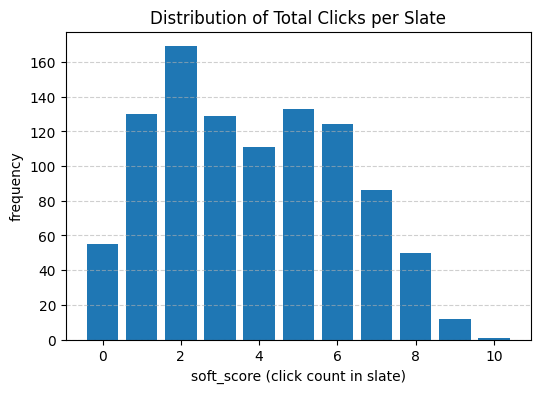


First five interaction records:


,round,slate,clicks,binary_reward,soft_score
0,0,"[987, 67, 628, 193, 800, 921, 893, 528, 391, 945]","[0, 0, 0, 1, 0, 1, 1, 0, 1, 1]",1,5
1,1,"[503, 440, 310, 254, 530, 193, 287, 859, 739, ...","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]",1,3
2,2,"[303, 648, 233, 141, 363, 753, 315, 833, 33, 855]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]",1,2
3,3,"[762, 837, 437, 574, 491, 785, 305, 810, 636, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
4,4,"[987, 67, 628, 193, 800, 921, 893, 528, 391, 945]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 0]",1,5


In [43]:
"""
Slate Bandit Simulation
-----------------------
* Catalog size       : 1000 items
* Slate size (k)     : 10
* Rounds             : 2 000
* True CTRs          : drawn from Beta(2, 8)
* Policies           : 50 % random, 50 % greedy-oracle
* Feedback captured  :
    - clicks (vector length k, 0/1 per position)
    - binary_reward  (1 if any click, else 0)
    - soft_score     (sum of clicks in slate)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- configuration ----------------
np.random.seed(42)
N_ITEMS     = 1_000        # size of item catalog
SLATE_K     = 10           # slate length
N_ROUNDS    = 2_000        # number of interactions

# ---------------- true environment -------------
true_ctr = np.random.beta(2, 8, size=N_ITEMS)  # ground-truth CTRs (0-1)

def random_policy(k=SLATE_K):
    """Uniform random slate of length k."""
    return np.random.choice(N_ITEMS, size=k, replace=False)

def greedy_policy(k=SLATE_K):
    """Oracle slate: top-k items by true CTR (descending)."""
    return np.argsort(true_ctr)[-k:][::-1]

# ---------------- simulation loop --------------
records = []


for t in range(1000):
    # Mix exploration and exploitation
    slate = random_policy() if np.random.rand() < 0.5 else greedy_policy()
   
    # Independent Bernoulli clicks conditioned on true CTR
    clicks = np.random.binomial(1, true_ctr[slate])
    print(f"slate:{slate} t:{t} clicls:{clicks} true_ctr[slate]:{true_ctr[slate]}")
    records.append(
        {
            "round":             t,
            "slate":             slate,                 # list[int]
            "clicks":            clicks,                # list[int] length k
            "binary_reward":     int(clicks.any()),     # 1 if any click
            "soft_score":        int(clicks.sum()),     # total clicks in slate
        }
    )

df = pd.DataFrame(records)

# ---------------- quick analytics ----------------
print("Average binary reward (any-click):", df["binary_reward"].mean())
print("Average soft score (total clicks):",  df["soft_score"].mean())

plt.figure(figsize=(6, 4))
plt.hist(df["soft_score"], bins=np.arange(SLATE_K + 2) - 0.5, rwidth=0.8)
plt.title("Distribution of Total Clicks per Slate")
plt.xlabel("soft_score (click count in slate)")
plt.ylabel("frequency")
plt.grid(axis="y", ls="--", alpha=0.6)
plt.show()

print("\nFirst five interaction records:")
display(df.head())

In [ ]:
# the 2 means 2 items selected. why are 0 adn 10 smaller? Because of exploration strategy. Doesnt get to ends enough? No should be uniform. 
# must be some distribution.. 

In [26]:
a = [1,2,3,4,5]
a[1:]

[2, 3, 4, 5]

In [27]:
true_ctr[:10]

array([0.24718271, 0.16419095, 0.31752371, 0.10875451, 0.36380962,
       0.07263464, 0.38212137, 0.11709096, 0.12737507, 0.24454437])

In [33]:
n = 1
p = 0.5 #5 ones in 10 trials
np.random.binomial(n, p, 10)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [42]:
np.random.binomial(1,[0.8]) # an array [.2,.3] means 20% ones and 30% 1s with 2 values[1,0]

array([1])

In [34]:
true_ctr.shape

(1000,)

In [2]:
len(df)

2000

Column         Description
round.         Interaction index
slate.         np.ndarray of item IDs shown (shape = (k,))
clicks.        np.ndarray of 0/1 click indicators for each slate position
binary_reward  1 ⇢ at least one click in slate; 0 ⇢ no clicks
soft_score.    Total number of clicks in slate (0 – k)


In [7]:
df["slate"] = df["slate"].apply(lambda x: list(x))
df["clicks"] = df["clicks"].apply(lambda x: list(x))

df.to_csv("slate.csv", index=False)
# if we leave off index=False it adds an index column in column 0. But we already have that as "round"
# would be duplicate column

In [8]:
import os
os.getcwd()

'/Users/dc/coursera_rl/sampling_course2'

In [10]:
import pandas as pd
# columns slate and clicks are lists, convert themn to lists from string 
#round,slate,clicks,binary_reward,soft_score
#0,[987  67 628 193 800 921 893 528 391 945],[0 0 0 1 0 1 1 0 1 1],1,5


df_loaded = pd.read_csv("slate.csv", converters={
    "slate":  eval,    # turn the stringified list back into Python list
    "clicks": eval,
})

df_loaded.head(10)

,round,slate,clicks,binary_reward,soft_score
0,0,"[987, 67, 628, 193, 800, 921, 893, 528, 391, 945]","[0, 0, 0, 1, 0, 1, 1, 0, 1, 1]",1,5
1,1,"[503, 440, 310, 254, 530, 193, 287, 859, 739, ...","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]",1,3
2,2,"[303, 648, 233, 141, 363, 753, 315, 833, 33, 855]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]",1,2
3,3,"[762, 837, 437, 574, 491, 785, 305, 810, 636, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
4,4,"[987, 67, 628, 193, 800, 921, 893, 528, 391, 945]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 0]",1,5
5,5,"[987, 67, 628, 193, 800, 921, 893, 528, 391, 945]","[1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",1,5
6,6,"[561, 194, 405, 369, 255, 510, 94, 169, 246, 226]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
7,7,"[218, 296, 13, 151, 993, 195, 334, 530, 783, 818]","[0, 1, 1, 0, 1, 1, 0, 1, 0, 0]",1,5
8,8,"[396, 320, 275, 357, 863, 517, 834, 732, 891, 69]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1,1
9,9,"[944, 848, 818, 75, 444, 707, 415, 856, 692, 832]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 1]",1,3
